In [1]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 100)
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Quad
from datetime import datetime
from math import pi
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
import random
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
t = time()

In [2]:
# Keras imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.layers.recurrent import LSTM
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils, generic_utils
from sklearn.metrics import f1_score
from keras.models import Model
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras import regularizers
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from weightnorm import data_based_init, AdamWithWeightnorm
from keras.utils import np_utils
import keras.backend as K
from itertools import product
from functools import partial
from keras.layers.noise import GaussianNoise
from keras.layers.advanced_activations import ELU
from keras.constraints import maxnorm
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, merge, add
from keras.models import load_model

Using TensorFlow backend.


In [3]:
from sklearn import model_selection
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn import cross_validation
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [5]:
# Import custom scripts and functions
%aimport model_performance_evaluation
%aimport custom_metrics
%aimport data_processing
%aimport make_keras_generators

In [6]:
test_data = [
            "USDCHF1440.csv",
              #"EURAUD14402.csv",
#              "EURJPY1440.csv", 
#              "EURGBP1440.csv"
            ]
#random.shuffle(test_data)
#print(test_data)

In [46]:
# Create list of target csvs
data = ["EURJPY1440.csv", "EURGBP1440.csv","USDCAD1440.csv","GBPUSD1440.csv",\
        "EURUSD14402.csv","USDCHF1440.csv","EURAUD14402.csv","AUDUSD1440.csv",\
               "GBPJPY1440.csv", "NZDUSD1440.csv", "EURUSD240.csv"]
#random.shuffle(data_no_indi)
#print(data_no_indi)

In [47]:

# allows us to easily modify how many days ahead and before we look:

lookforward = 4 # how many days we look forward
lookback = 8 # how many days we look back

        
# Choose features to be used in feature generation function
feature_generation_channels = ["O", "H", "L", "C", "V"] 

X,y, df_ohlc_and_rectangles, groups,\
groups_count, scalers, groups_dict,\
scaled_columns, df_data_unscaled,\
y_rects, proximal_columns, distal_columns = data_processing.prepare_data(data, 
                                                                 lookforward, 
                                                                 lookback,
                                                                 feature_generation_channels,
                                                                 lag=0,
                                                                 change_open_close=1, 
                                                                 range_high_low=1,
                                                                 rolling_mean_range_HL=1,
                                                                 range_high_close=1,
                                                                 std_dev=1,
                                                                 rolling_mean=1,
                                                                 change_open_close_shift=1,
                                                                 range_high_low_shift=0,
                                                                 range_high_close_shift=1,
                                                                 diff_shift=1,
                                                                 rolling_mean_shift=1,
                                                                 std_dev_shift=0,
                                                                 center=True
                                                                )

Processing:  EURJPY1440.csv Number  1  of  11
We now have: (0, 0) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: EURJPY1440.csv (4950, 12)
~~~
Identifying zone ends with zone_ender func: EURJPY1440.csv (4950, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features: 

/Users/production204/Github/the-internet-of-forex/data_processing.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["change_open_close"] = df_data["O"] - df_data["C"] # add change column, difference between open and close


 Difference between open and close
Shape is now: (4950, 6)

/Users/production204/Github/the-internet-of-forex/data_processing.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_low"] = df_data["H"] - df_data["L"] # add range, difference between high and low
/Users/production204/Github/the-internet-of-forex/data_processing.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_close"] = df_data["H"] - df_data["C"] # add range, difference between high and low
/Users/production204/Github/the-internet-of-forex/data_processing.py:69: SettingWithCopyWarning: 
A valu


~~~
Generating features:  Range between high and low
Shape is now: (4950, 7)
~~~
Generating features:  Range between high and low
Shape is now: (4950, 8)
~~~
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 

Merging the scaled data and the unscalable data back together with pd.concat: EURGBP1440.csv (4951, 250)
Finished: EURGBP1440.csv (4951, 250)
--------------------------------
Processing:  USDCAD1440.csv Number  3  of  11
We now have: (9901, 250) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: USDCAD1440.csv (4943, 12)
~~~
Identifying zone ends with zone_ender func: USDCAD1440.csv (4943, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C'

Finished: GBPUSD1440.csv (4516, 250)
--------------------------------
Processing:  EURUSD14402.csv Number  5  of  11
We now have: (19360, 250) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: EURUSD14402.csv (4949, 12)
~~~
Identifying zone ends with zone_ender func: EURUSD14402.csv (4949, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
    

Finished: USDCHF1440.csv (4887, 250)
--------------------------------
Processing:  EURAUD14402.csv Number  7  of  11
We now have: (29196, 250) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: EURAUD14402.csv (4624, 12)
~~~
Identifying zone ends with zone_ender func: EURAUD14402.csv (4624, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
    

Merging the scaled data and the unscalable data back together with pd.concat: AUDUSD1440.csv (4951, 250)
Finished: AUDUSD1440.csv (4951, 250)
--------------------------------
Processing:  GBPJPY1440.csv Number  9  of  11
We now have: (38771, 250) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: GBPJPY1440.csv (4978, 12)
~~~
Identifying zone ends with zone_ender func: GBPJPY1440.csv (4978, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C

Identifying supply/demand with supply_or_demand func: EURUSD240.csv (8749, 12)
~~~
Identifying zone ends with zone_ender func: EURUSD240.csv (8749, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features:  Difference between open and close
Shape is now: (8749, 6)
~~~
Generating features:  Range between high and low
Shape is now: (8749, 7)
~~~
Generating features:  Range between high and low
Shape is now: (8749, 8)
~~~
Generating features:  Change over time for loo

In [48]:
#print("Your X columns:", list(X))
#print("Your y columns:", list(y))

In [49]:
#np.bincount(y.rectangle_here.values)

In [50]:
#print(X.shape, y.shape)

In [51]:
# Save data into backup X, y so we don't have to reload it 

X_backup = X
y_backup = y

In [52]:
# Reset to backup df

X = X_backup
y = y_backup

In [53]:
#y_train_weights = pd.DataFrame(X_train['rectangle_here']*int(np.bincount(y.rectangle_here.values)[0:1] / np.bincount(y.rectangle_here.values)[1:])).fillna(value=1).values
#y_valid_weights = pd.DataFrame(X_valid['rectangle_here']*int(np.bincount(y.rectangle_here.values)[0:1] / np.bincount(y.rectangle_here.values)[1:])).fillna(value=1).values
#y_test_weights = pd.DataFrame(X_test['rectangle_here']*int(np.bincount(y.rectangle_here.values)[0:1] / np.bincount(y.rectangle_here.values)[1:])).fillna(value=1).values

### Prepare data for LSTM and residual Conv1D testing

In [54]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y['rectangle_here'], test_size=0.10, random_state=0)

# Create validation split from train split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05, random_state=0)

In [55]:
%aimport data_processing
# Drop features from X

features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      #'O', 'H', 'L', 'C', 
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      'rectangle_here', 'supply_demand']


X_train = data_processing.drop_non_features(X_train, features_to_remove, zero_columns=1)
X_test = data_processing.drop_non_features(X_test, features_to_remove, zero_columns=1)
X_valid = data_processing.drop_non_features(X_valid, features_to_remove, zero_columns=1)

In [56]:
# Stack to 3dim for 1D conv net
X_train = data_processing.X_to_Conv1D_arrays(X_train)
X_valid = data_processing.X_to_Conv1D_arrays(X_valid)
X_test = data_processing.X_to_Conv1D_arrays(X_test)

X:  (49145, 132, 1)
X:  <class 'numpy.ndarray'>
X:  (2587, 132, 1)
X:  <class 'numpy.ndarray'>
X:  (5749, 132, 1)
X:  <class 'numpy.ndarray'>


#### LSTM

In [57]:
# Create generators and define batch_size and other hyperparams


batch_size = 16

# Create generators
train_gen = make_keras_generators.train_generator(X_train, y_train.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid.values, batch_size)

input_shape = X_train.shape[1:3]
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1
epochs = 50
multiplier = 1

validation_steps = int(len(X_valid)/batch_size)+1

class_weight={0:1., 1:7.}

In [34]:
#lr = LearningRateScheduler(lambda e: tiny_resnet.sigmoidal_decay(e, end=epochs))
mc = ModelCheckpoint('LSTM.hdf5', monitor='val_loss', save_best_only=True,save_weights_only=True)


rlop = ReduceLROnPlateau(
                    monitor='val_loss', 
                    mode='min',
                    factor=0.95,
                    patience=2, 
                    min_lr=0.00001,
                    verbose=1,
                        )

es = EarlyStopping(
        monitor='val_fbeta_score',
        min_delta=0.01,
        mode='max',
        patience=10,
        verbose=1)



callbacks = [ es, rlop, mc]

In [80]:
# TODO: try model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# TODO: try 
'''
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
'''
model = Sequential()
model.add(Conv1D(64, 8, input_shape=(input_shape), activation=ELU()))
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(128, dropout=0.2,
               #activation=ELU(),
               return_sequences=True,
              ))  

model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/activations.py:89: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 125, 64)           576       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 31, 64)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 31, 128)           98816     
_________________________________________________________________
flatten_4 (Flatten)          (None, 3968)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1016064   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total para

In [82]:
model.compile(optimizer=AdamWithWeightnorm(lr=0.125), 
              loss='binary_crossentropy',
                metrics = ['accuracy', 
                           custom_metrics.fbeta_score,
                           custom_metrics.recall,
                          custom_metrics.precision,]
            )


history = model.fit_generator(
                    train_gen,
                    steps_per_epoch=int(len(X_train)/batch_size)+1,
                    epochs=epochs,
                    verbose=1,
                    callbacks=callbacks,
                    #max_q_size=1,
                    #pickle_safe=False,
                    validation_data = valid_gen,
                    class_weight = class_weight,
                    validation_steps = validation_steps
                   )

Epoch 1/5
2943/3072 [===========================>..] - ETA: 11s - loss: 1.2968 - acc: 0.5753 - fbeta_score: 0.2563 - recall: 0.5863 - precision: 0.1958

KeyboardInterrupt: 

In [ ]:
model.save('LSTM-136pm-june26.h5')

In [61]:
#lstm = load_model('LSTM-v1-june26.h5')
model = load_model('floyd-ignore/func-residual-v1-june26.h5', custom_objects={
                                                        'AdamWithWeightnorm': AdamWithWeightnorm,
                                                        'fbeta_score': custom_metrics.fbeta_score,
                                                        'recall': custom_metrics.recall,
                                                        'precision': custom_metrics.precision
                                                        })

In [60]:
preds, y_pred_proba = model_performance_evaluation.eval(lstm, X_test, y_test.values, batch_size=16, sensitivity=0.5, binary=1, sequential=0)

(5749, 1)
(5749,)
Your classification report: 
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      5027
          1       0.56      0.73      0.63       722

avg / total       0.91      0.89      0.90      5749

-----------------------------
Log loss: 0.332503409068
F1 weighted: 0.900050689309
F1 macro: 0.786394533878
F1 micro: 0.894242476953
Accuracy score: 0.894242476953
Hamming Loss: 0.105757523047
Average precision score 0.662778246164
ROC AUC SCORE: 0.932717067448
Your confusion matrix: 
[[4613  414]
 [ 194  528]]
-----------------------------


In [ ]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# summarize history for loss
fig_loss = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# show lr changing
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['lr'])
#plt.plot(history.history['val_fbeta_score'])
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['lr'])
#plt.plot(history.history['val_fbeta_score'])
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Conv1D with residual layers

In [18]:
# TODO: Add batch norm like resnet
# TODO: Add MaxPooling2D
# TODO: Try SMOTE or manual oversampling
# TODO: Plot some basic stuff about our features

input_layer = Input(shape=input_shape)

x = Conv1D(16*multiplier, (4*multiplier), padding='causal')(input_layer)
x = ELU()(x)
y = Conv1D(16*multiplier, (4*multiplier), padding='causal')(x)
y = ELU()(y)
z = add([x, y])

a = Conv1D(32*multiplier, (4*multiplier), padding='causal')(z)
a = ELU()(a)
b = Conv1D(32*multiplier, (4*multiplier), padding='causal')(a)
b = ELU()(b)
c = add([a, b])

d = Conv1D(64*multiplier, (4*multiplier), padding='causal')(c)
d = ELU()(d)
e = Conv1D(64*multiplier, (4*multiplier), padding='causal')(d)
e = ELU()(e)
f = add([d, e])

g = Dropout(0.3)(f)
g = Flatten()(g)
g = Dense(256)(g)
g = Dropout(0.5)(g)
g = Dense(1)(g)
g = Activation('sigmoid')(g)

model = Model(input=input_layer, output=g)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


In [19]:
#lr = LearningRateScheduler(lambda e: tiny_resnet.sigmoidal_decay(e, end=epochs))
mc = ModelCheckpoint('weights.best.keras.hdf5', monitor='val_loss', save_best_only=True,save_weights_only=True)


rlop = ReduceLROnPlateau(
                    monitor='val_loss', 
                    mode='min',
                    factor=0.95,
                    patience=2, 
                    min_lr=0.00001,
                    verbose=1,
                        )

es = EarlyStopping(
        monitor='val_fbeta_score',
        min_delta=0.01,
        mode='max',
        patience=10,
        verbose=1)



callbacks = [ es, rlop, mc]

In [20]:
model.compile(optimizer=AdamWithWeightnorm(lr=0.0025), 
              loss='binary_crossentropy',
                metrics = ['accuracy', 
                           custom_metrics.fbeta_score,
                           custom_metrics.recall,
                          custom_metrics.precision,]
            )


history = model.fit_generator(
                    train_gen,
                    steps_per_epoch=int(len(X_train)/batch_size)+1,
                    epochs=epochs,
                    verbose=1,
                    callbacks=callbacks,
                    #max_q_size=1,
                    #pickle_safe=False,
                    validation_data = valid_gen,
                    class_weight = class_weight,
                    validation_steps = validation_steps
                   )





Epoch 1/50
3072/3072 [==============================] - 198s - loss: 0.7901 - acc: 0.7817 - fbeta_score: 0.4565 - recall: 0.7237 - precision: 0.3698 - val_loss: 0.4112 - val_acc: 0.8203 - val_fbeta_score: 0.5225 - val_recall: 0.7938 - val_precision: 0.4234
Epoch 2/50
3072/3072 [==============================] - 206s - loss: 0.6368 - acc: 0.8328 - fbeta_score: 0.5235 - recall: 0.7791 - precision: 0.4289 - val_loss: 0.3745 - val_acc: 0.8311 - val_fbeta_score: 0.5406 - val_recall: 0.8019 - val_precision: 0.4440
Epoch 3/50
3072/3072 [==============================] - 201s - loss: 0.6112 - acc: 0.8409 - fbeta_score: 0.5380 - recall: 0.7883 - precision: 0.4423 - val_loss: 0.3845 - val_acc: 0.8276 - val_fbeta_score: 0.5418 - val_recall: 0.8157 - val_precision: 0.4390
Epoch 4/50
3072/3072 [==============================] - 216s - loss: 0.5864 - acc: 0.8470 - fbeta_score: 0.5471 - recall: 0.7941 - precision: 0.4516 - val_loss: 0.3504 - val_acc: 0.8434 - val_fbeta_score: 0.5597 - val_recall: 0.8

In [21]:
model.save('func-residual-v1-june26.h5')

In [41]:
#lstm = load_model('LSTM-v1-june26.h5')
model = load_model('func-residual-v1-june26.h5', custom_objects={
                                                        'AdamWithWeightnorm': AdamWithWeightnorm,
                                                        'fbeta_score': custom_metrics.fbeta_score,
                                                        'recall': custom_metrics.recall,
                                                        'precision': custom_metrics.precision


                                                        })

In [47]:
preds, y_pred_proba = model_performance_evaluation.eval(model, X_test, y_test.values, batch_size=64, sensitivity=0.45, binary=1, sequential=0)

(5749, 1)
(5749,)
Your classification report: 
             precision    recall  f1-score   support

          0       0.98      0.89      0.93      5027
          1       0.53      0.85      0.65       722

avg / total       0.92      0.89      0.90      5749

-----------------------------
Log loss: 0.271056417243
F1 weighted: 0.8962572439
F1 macro: 0.790972162054
F1 micro: 0.885545312228
Accuracy score: 0.885545312228
Hamming Loss: 0.114454687772
Average precision score 0.697182699326
ROC AUC SCORE: 0.94494039665
Your confusion matrix: 
[[4479  548]
 [ 110  612]]
-----------------------------


dict_keys(['val_recall', 'val_loss', 'lr', 'val_acc', 'precision', 'loss', 'acc', 'fbeta_score', 'val_fbeta_score', 'recall', 'val_precision'])


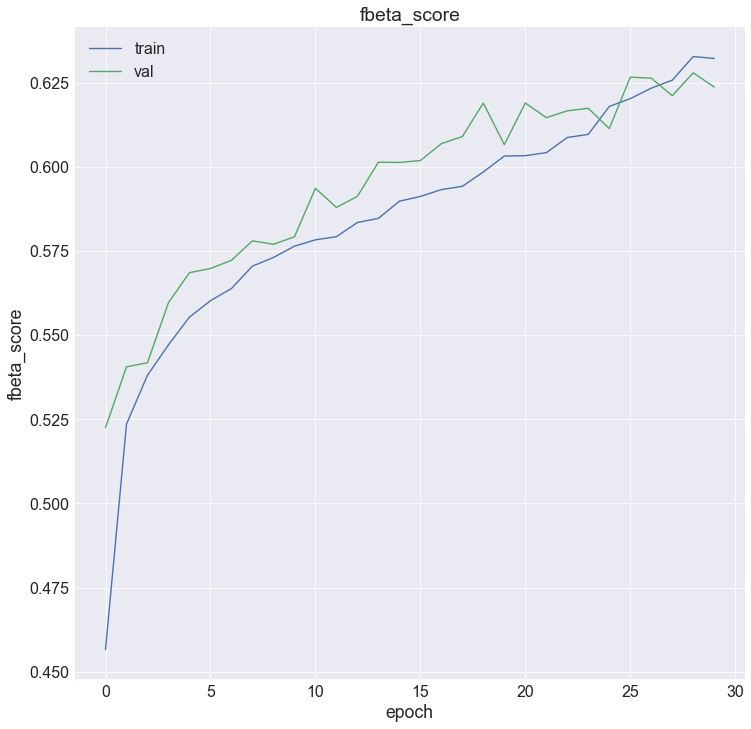

In [23]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['val_recall', 'val_loss', 'lr', 'val_acc', 'precision', 'loss', 'acc', 'fbeta_score', 'val_fbeta_score', 'recall', 'val_precision'])


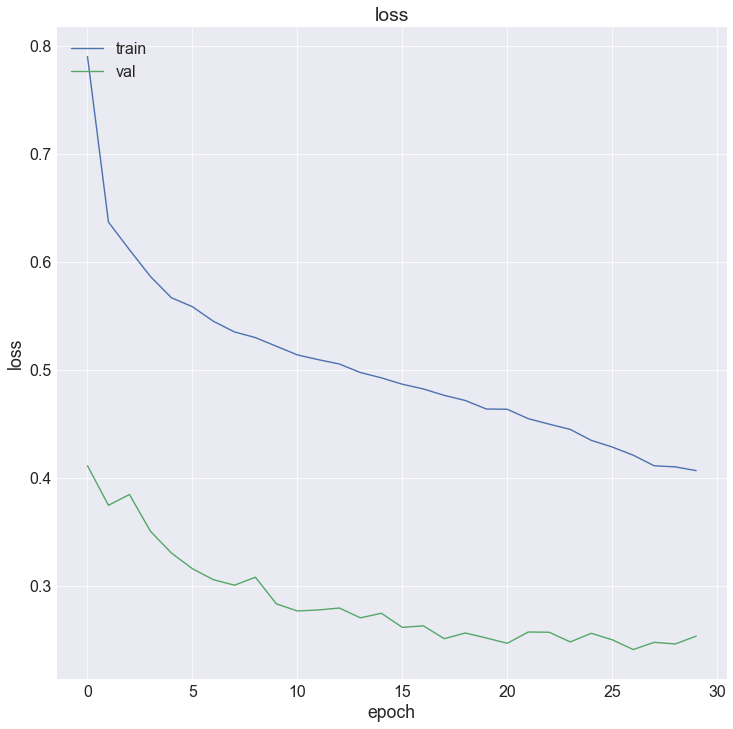

In [24]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['val_recall', 'val_loss', 'lr', 'val_acc', 'precision', 'loss', 'acc', 'fbeta_score', 'val_fbeta_score', 'recall', 'val_precision'])


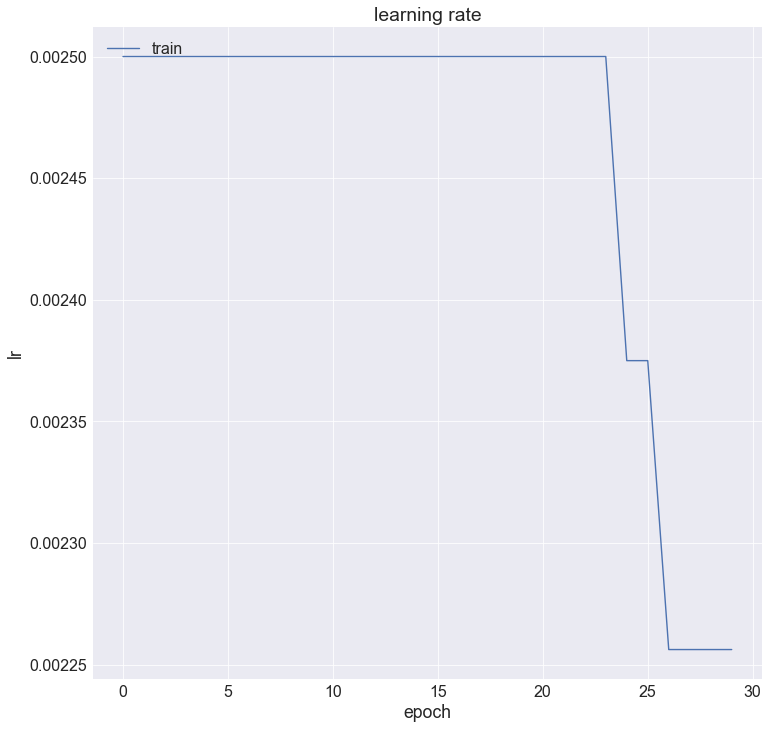

In [25]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['lr'])
#plt.plot(history.history['val_fbeta_score'])
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Train models for Proximal and Distal matching

### Train Conv2D model for Distal matching

##### Prepare data for Distal specific model training

In [ ]:
features = scaled_columns

labels = distal_columns

# Select only rows that contain zones
df_zones = df_ohlc_and_rectangles.loc[df_ohlc_and_rectangles['rectangle_here'] == 1]

# Split out the new df into features and labels
df_X = df_zones[features]
df_y = df_zones[labels]

df_X = data_processing.drop_non_features(df_X, features_to_remove, zero_columns=1)
df_y = data_processing.drop_non_features(df_y, ['Distal'], zero_columns=1)

In [ ]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)
# Create validation split from training
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

y_train_distal = data_processing.distal_split(y_train)
y_valid_distal = data_processing.distal_split(y_valid)
y_test_distal = data_processing.distal_split(y_test)

print(y_train_distal.shape)
print(y_test_distal.shape)
print(y_valid_distal.shape)

In [ ]:
# Stack to 4dim for conv net
X_train = data_processing.X_to_Conv2D_arrays(X_train)
X_valid = data_processing.X_to_Conv2D_arrays(X_valid)
X_test = data_processing.X_to_Conv2D_arrays(X_test)

# Create generators
train_gen = make_keras_generators.train_generator(X_train, y_train_distal.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid_distal.values, batch_size)

#### Train Conv2D model for Distal line

In [ ]:
batch_size = 128
input_shape = X_train.shape[1:4]
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1

In [ ]:
model = get_resnet()

In [ ]:


conv = Sequential()

conv.add(Conv2D(32, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(Conv2D(32, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(MaxPooling2D((1, 2)))
conv.add(Dropout(0.2))

conv.add(Conv2D(64, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(Conv2D(64, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(Dropout(0.3))

conv.add(Conv2D(128, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(Conv2D(128, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(MaxPooling2D(pool_size=(1, 2)))
conv.add(Dropout(0.4))

conv.add(Flatten())
conv.add(Dense(512))
conv.add(Activation('relu'))
conv.add(Dropout(0.5))

conv.add(Dense(y_train_distal.shape[1]))
conv.add(Activation('sigmoid'))

callbacks = [
    EarlyStopping(
        monitor='val_fbeta_score',
        patience=10,
        verbose=1)

]

conv.compile(
                loss = 'binary_crossentropy', 
                optimizer = AdamWithWeightnorm(lr=0.0025), 
                metrics = ['accuracy', 
                           custom_metrics.fbeta_score,
                           custom_metrics.recall,
                          custom_metrics.precision,]
            )


history = conv.fit_generator(
                    train_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=1,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data = valid_gen,
                    validation_steps = validation_steps
                   )







In [ ]:
preds, pred_classes, y_pred_proba = model_performance_evaluation.eval(conv, X_test, y_test_distal.values, binary=0, keras=1)

In [ ]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Train Conv2D model for Distal matching

##### Prepare data for Proximal specific matching

In [ ]:
features = scaled_columns + distal_columns

labels = proximal_columns

# Select only rows that contain zones
df_zones = df_ohlc_and_rectangles.loc[df_ohlc_and_rectangles['rectangle_here'] == 1]

# Split out the new df into features and labels
df_X = df_zones[features]
df_y = df_zones[labels]

df_X = data_processing.drop_non_features(df_X, features_to_remove, zero_columns=1)
df_y = data_processing.drop_non_features(df_y, ['Proximal'], zero_columns=1)

In [ ]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)
# Create validation split from training
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [ ]:
y_train_proximal = data_processing.proximal_split(y_train)
y_valid_proximal = data_processing.proximal_split(y_valid)
y_test_proximal = data_processing.proximal_split(y_test)

print(y_train_proximal.shape)
print(y_test_proximal.shape)
print(y_valid_proximal.shape)

In [ ]:
# Stack to 4dim for conv net
X_train = data_processing.X_to_Conv2D_arrays(X_train)
X_valid = data_processing.X_to_Conv2D_arrays(X_valid)
X_test = data_processing.X_to_Conv2D_arrays(X_test)

# Create generators
train_gen = make_keras_generators.train_generator(X_train, y_train_proximal.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid_proximal.values, batch_size)

#### Train Conv2D model for Proximal line

In [ ]:
batch_size = 128
input_shape = X_train.shape[1:4]
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1

In [ ]:

conv = Sequential()

conv.add(Conv2D(32, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(Conv2D(32, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(MaxPooling2D((1, 2)))
conv.add(Dropout(0.2))

Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

conv.add(Conv2D(64, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(Conv2D(64, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(Dropout(0.3))

conv.add(Conv2D(128, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(Conv2D(128, (1, 4), input_shape = input_shape))
#conv.add(BatchNormalization())
conv.add(Activation(LeakyReLU(alpha=0.2)))
conv.add(MaxPooling2D(pool_size=(1, 2)))
conv.add(Dropout(0.4))

conv.add(Flatten())
conv.add(Dense(512))
conv.add(Activation('relu'))
conv.add(Dropout(0.5))

conv.add(Dense(y_train_proximal.shape[1]))
conv.add(Activation('sigmoid'))

callbacks = [
    EarlyStopping(
        monitor='val_fbeta_score',
        patience=10,
        verbose=1)

]

conv.compile(
                loss = 'binary_crossentropy', 
                optimizer = AdamWithWeightnorm(lr=0.0025), 
                metrics = ['accuracy', 
                           custom_metrics.fbeta_score,
                           custom_metrics.recall,
                          custom_metrics.precision,]
            )


history = conv.fit_generator(
                    train_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=1,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data = valid_gen,
                    validation_steps = validation_steps
                   )







In [ ]:
preds, pred_classes, y_pred_proba = model_performance_evaluation.eval(conv, X_test, y_test_proximal.values, binary=0, keras=1)

In [ ]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Make predictions on raw data and visualize

In [ ]:
# allows us to easily modify how many days ahead and before we look:
lookforward = 4 # how many days we look forward
lookback = 7 # how many days we look back

        
# Choose features to be used in feature generation function
feature_generation_channels = ["O", "H", "L", "C", "V"] 

X_, y_, df_ohlc_and_rectangles, groups,\
groups_count, scalers, groups_dict,\
scaled_columns, df_data_unscaled,\
y_rects, proximal_columns, distal_columns = data_processing.prepare_data(test_data, 
                                                                 lookforward, 
                                                                 lookback,
                                                                 feature_generation_channels,
                                                                 lag=0,
                                                                 change_open_close=1, 
                                                                 range_high_low=1,
                                                                 rolling_mean_range_HL=1,
                                                                 range_high_close=1,
                                                                 std_dev=1,
                                                                 rolling_mean=1,
                                                                 change_open_close_shift=1,
                                                                 range_high_low_shift=0,
                                                                 range_high_close_shift=1,
                                                                 diff_shift=1,
                                                                 rolling_mean_shift=1,
                                                                 std_dev_shift=1,
                                                                 center=True
                                                                )

In [ ]:
X_ = data_processing.drop_non_features(X_, features_to_remove, zero_columns=1)

In [ ]:
y_ = y_['rectangle_here']

In [ ]:
X_array, y_array = data_processing.to_Conv2D_arrays(X_,y_)

In [ ]:
preds, pred_classes, y_pred_proba = model_performance_evaluation.eval(conv, X_array, y_array, binary=1, keras=1)

In [ ]:
test_data

In [ ]:
# For lining up predictions and data
#df_predictions = pd.DataFrame(preds.astype(int))
df_pred_OHLC = pd.concat([preds, 
                          pd.DataFrame(df_data_unscaled[['O', 'H', 'L', 'C']]).reset_index(drop=True)], 
                         axis=1, 
                         ignore_index=True)  
df_pred_OHLC.columns=['predicted', 'O', 'H', 'L','C']  

In [ ]:
df_pred_OHLC

## Visualize preds and OHLC

In [ ]:
df = df_data_unscaled

In [ ]:
# Convert Dates to datetime
df["Epoch Date"] = pd.to_datetime(df["Epoch Date"], unit='s')
df["Epoch Date Start"] = pd.to_datetime(df["Epoch Date Start"], unit='s')
df["Epoch Date End"] = pd.to_datetime(df["Epoch Date End"], unit='s')

w = 12*60*60*1000 # half day in ms

TOOLS = "pan,xwheel_zoom,wheel_zoom,box_zoom,reset,save"
p = figure(x_axis_type="datetime", tools=TOOLS, plot_height=500, 
           plot_width=1200, title="🍩", active_scroll='xwheel_zoom')
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.5

p.segment(df['Epoch Date'], df.H, df['Epoch Date'], df.L, color="black")
p.vbar(df['Epoch Date'], w, df.O, df.C)

# Add Rectangle data
df_sp = df.dropna(subset=['Supply/Demand'])

source_supply = ColumnDataSource(df_sp.loc[df_sp['Supply/Demand']=='SUPPLY', :])
rect_supply = Quad(left="Epoch Date Start", top="Proximal", right="Epoch Date End", bottom="Distal", fill_color="firebrick", line_alpha=0.2, fill_alpha=0.2) 
p.add_glyph(source_supply, rect_supply)

source_demand = ColumnDataSource(df_sp.loc[df_sp['Supply/Demand']=='DEMAND', :])
rect_demand = Quad(left="Epoch Date Start", top="Proximal", right="Epoch Date End", bottom="Distal", fill_color="steelblue", line_alpha=0.2, fill_alpha=0.2)
p.add_glyph(source_demand, rect_demand)


output_file("candlestick.html", title="candlestick data SPC test")
show(p)  # open a browser